In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
    
injection_results = pd.read_csv('C:/Users/60002/Documents/GitHub/sunnyhills/personal_epochs/veronica/july/test_data.csv')
recovery_proportion = np.divide(np.array(injection_results['injected_period']),np.array(injection_results['recovered_period']))
injection_results = injection_results.join(pd.Series(recovery_proportion,name='recovery_proportion'))
#len(np.where(injection_results['rotation_period']>2)[0])
#injection_results = injection_results.groupby('R_P')
#injection_results.head()

#injection_results.pivot('rotation_period','R_P','recovery_proportion')


Text(111.5, 0.5, 'Planetary Radius ($R_{{{Jupiter}}}$)')

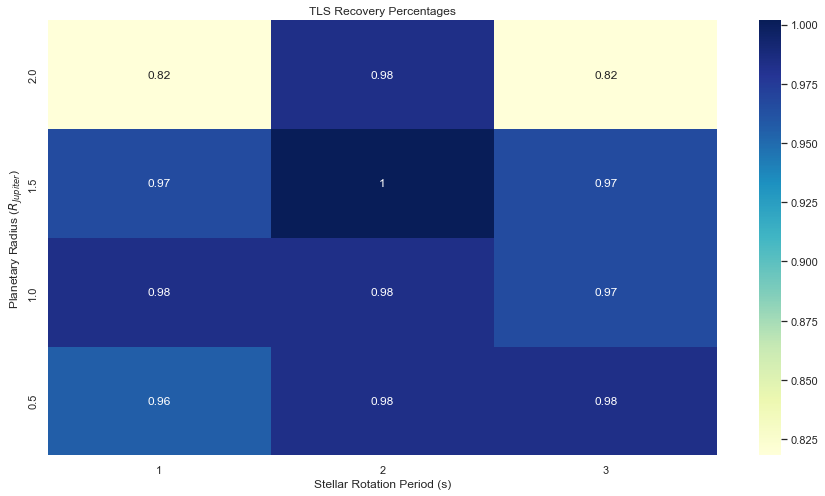

In [13]:
fig,ax = plt.subplots()

ax =sns.heatmap(injection_results.pivot('R_P','rotation_period','recovery_proportion'),annot=True,cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('TLS Recovery Percentages')
ax.set_xlabel('Stellar Rotation Period (s)')
ax.set_ylabel('Planetary Radius ($R_{{{Jupiter}}}$)')



In [16]:
def heatmap_fn(path_to_csv:str,plot_dir:str=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    injection_results = pd.read_csv(path_to_csv)
    recovery_pctg = []

    for injected_periods, recovered_periods in zip(injection_results['injected_period'],injection_results['recovered_period']):
        injected = injected_periods.split(',')   
        recovered = recovered_periods.split(',')
        error = np.abs(np.divide(np.array(injected),np.array(recovered)) -1)
        recovery_pctg.append(len(np.where(error<=.01)[0]))
        
    injection_results = injection_results.join(pd.Series(recovery_pctg,name='recovery_proportion'))

    fig,ax = plt.subplots()

    ax =sns.heatmap(injection_results.pivot('R_P','rotation_period','recovery_pctg'),annot=True,cmap="YlGnBu")
    ax.invert_yaxis()
    ax.set_title('TLS Recovery Percentages')
    ax.set_xlabel('Stellar Rotation Period (s)')
    ax.set_ylabel('Planetary Radius ($R_{{{Jupiter}}}$)')

    if plot_dir!=None:
        if plot_dir[-1]!="/":
            plot_dir+="/"
    fig.savefig(plot_dir +"heatmap.png")
heatmap_fn('C:/Users/60002/Documents/GitHub/sunnyhills/personal_epochs/veronica/july/test_data.csv','C:/Users/60002/Documents/GitHub/sunnyhills/personal_epochs/veronica/july')

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''